In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
from PIL import Image
import os

import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

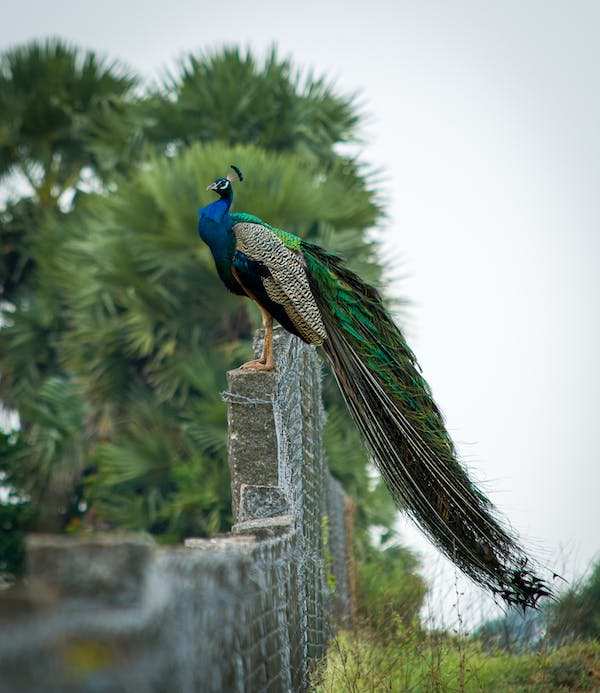

In [ ]:
peacock = Image.open("/content/peacock.jpeg")
peacock

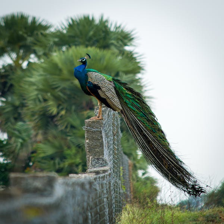

In [ ]:
peacock = peacock.resize(IMAGE_SHAPE)
peacock


In [ ]:
peacock = np.array(peacock)/255.0
peacock.shape

(224, 224, 3)

In [ ]:
peacock

array([[[0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        ...,
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824]],

       [[0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        ...,
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824]],

       [[0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        [0.78039216, 0.82352941, 0.84705882],
        ...,
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824],
        [0.81568627, 0.85098039, 0.87058824]],

       ...,

       [[0.25098039, 0.28235294, 0.29019608],
        [0.24313725, 0.2745098 , 0.28235294],
        [0.23529412, 0

In [ ]:
peacock[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
classifier.predict(peacock[np.newaxis, ...])

1/1 [==============================] - 9s 9s/step


array([[ 0.33879378, -0.26263267, -0.3090843 , ..., -0.8776207 ,
         2.6165245 , -0.11472403]], dtype=float32)

In [ ]:
result = classifier.predict(peacock[np.newaxis, ...])

1/1 [==============================] - 0s 22ms/step


In [ ]:
result

array([[ 0.33879378, -0.26263267, -0.3090843 , ..., -0.8776207 ,
         2.6165245 , -0.11472403]], dtype=float32)

In [ ]:
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

85

In [ ]:
image_labels = []
with open("/content/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()


In [ ]:
image_labels

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [ ]:
image_labels[predicted_label_index]

'peacock'

In [ ]:
#Exp. on Flower Dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin = dataset_url,  cache_dir = '.', untar = True)
# cache_dir indicates where to download data.
# untar true for unzipping

228813984/228813984 [==============================] - 11s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('datasets/flower_photos/tulips/7094271655_79a6f972c1_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8762189906_8223cef62f.jpg'),
 PosixPath('datasets/flower_photos/tulips/3430229687_32645b5738.jpg'),
 PosixPath('datasets/flower_photos/tulips/4579079143_f65b39dd9f.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713397694_bcbcbba2c2_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7145978709_2d1596f462.jpg'),
 PosixPath('datasets/flower_photos/tulips/15090146325_b7e1249e60.jpg'),
 PosixPath('datasets/flower_photos/tulips/5674707464_dc18de05b1.jpg'),
 PosixPath('datasets/flower_photos/tulips/17844723633_da85357fe3.jpg'),
 PosixPath('datasets/flower_photos/tulips/13513851673_9d813dc7b0.jpg')]

In [ ]:
image_count = len(list(data_dir.glob("*/*.jpg")))
print(image_count)

3670


In [ ]:
sunflowers = list(data_dir.glob("sunflowers/*"))
sunflowers[:10]

[PosixPath('datasets/flower_photos/sunflowers/21796333524_38fc8e0ab5_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4235259239_21f2eb4f2e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8929274876_17efc1774a_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14925397651_97dcddc383_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14646279002_9cdf97be97_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9481563239_01b585b41d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3865206264_5d81584bba.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/215798357_3f4bfa27b7.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9497774935_a7daec5433_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18766965343_9f42d4bedc_m.jpg')]

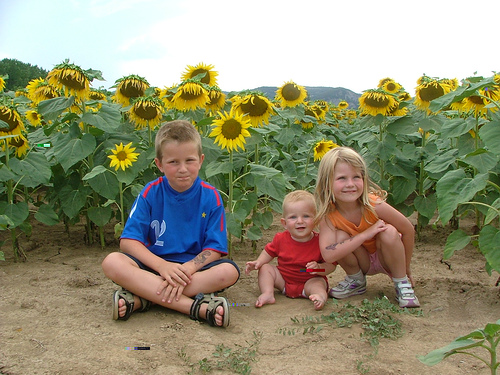

In [ ]:
Image.open(str(sunflowers[7]))

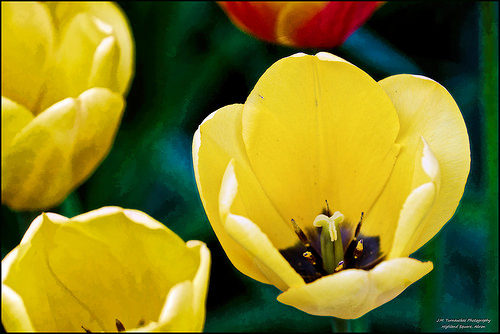

In [ ]:
tulips = list(data_dir.glob("tulips/*"))
Image.open(str(tulips[8]))

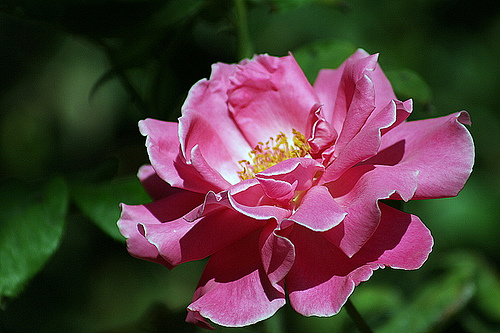

In [ ]:
roses = list(data_dir.glob("roses/*"))
Image.open(str(roses[20]))

In [ ]:
#read flowers images from disk into numpy array using opencv

flowers_images_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

In [ ]:
flowers_labels_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4,
}

In [ ]:
flowers_images_dict["sunflowers"][:3]

[PosixPath('datasets/flower_photos/sunflowers/21796333524_38fc8e0ab5_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4235259239_21f2eb4f2e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8929274876_17efc1774a_n.jpg')]

In [ ]:
str(flowers_images_dict["sunflowers"][3])

'datasets/flower_photos/sunflowers/14925397651_97dcddc383_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict["sunflowers"][3]))

In [ ]:
img.shape

(252, 320, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

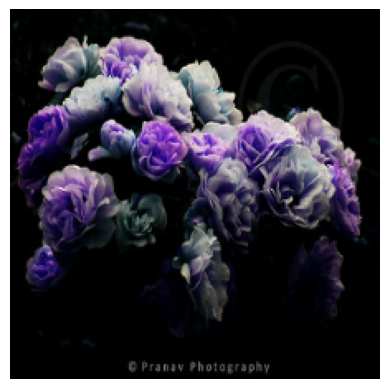

In [ ]:
plt.axis("off")
plt.imshow(X[0])

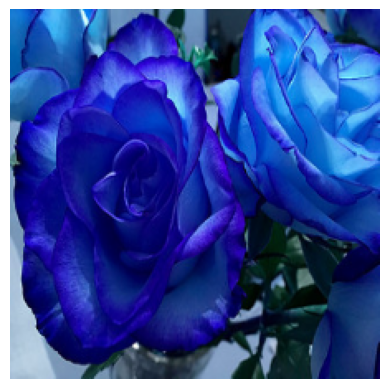

In [ ]:
plt.axis("off")
plt.imshow(X[1])

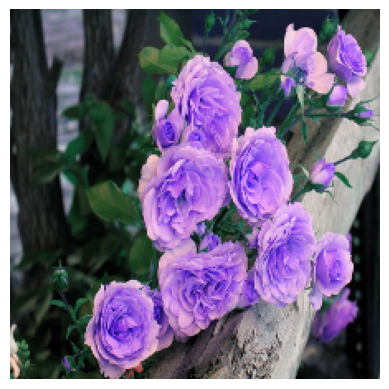

In [ ]:
plt.axis("off")
plt.imshow(X[10])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 959ms/step


array([974, 795, 795])

In [ ]:
image_labels[974]

'coral reef'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable = False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer = "adam",
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics = ["accuracy"])

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 9s 42ms/step - loss: 0.8500 - accuracy: 0.6791
Epoch 2/10
86/86 [==============================] - 3s 40ms/step - loss: 0.4281 - accuracy: 0.8456
Epoch 3/10
86/86 [==============================] - 3s 40ms/step - loss: 0.3343 - accuracy: 0.8866
Epoch 4/10
86/86 [==============================] - 4s 43ms/step - loss: 0.2762 - accuracy: 0.9142
Epoch 5/10
86/86 [==============================] - 3s 39ms/step - loss: 0.2396 - accuracy: 0.9215
Epoch 6/10
86/86 [==============================] - 3s 39ms/step - loss: 0.2071 - accuracy: 0.9430
Epoch 7/10
86/86 [==============================] - 3s 39ms/step - loss: 0.1822 - accuracy: 0.9528
Epoch 8/10
86/86 [==============================] - 4s 42ms/step - loss: 0.1654 - accuracy: 0.9586
Epoch 9/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1456 - accuracy: 0.9662
Epoch 10/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1317 - accuracy: 0.9713


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 64ms/step - loss: 0.3752 - accuracy: 0.8758


[0.37522092461586, 0.8758170008659363]